Attribute information:

target: DIE (1), LIVE (2)

age: 10, 20, 30, 40, 50, 60, 70, 80

gender: male (1), female (2)

    ------ no = 0,   yes = 1 ------
steroid: no, yes

antivirals: no, yes

fatique: no, yes

malaise: no, yes

anorexia: no, yes

liverBig: no, yes

liverFirm: no, yes

spleen: no, yes

spiders: no, yes

ascites: no, yes

varices: no, yes

histology: no, yes

bilirubin: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 --

alk: 33, 80, 120, 160, 200, 250 ---

sgot: 13, 100, 200, 300, 400, 500, ---

albu: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0, ---

protime: 10, 20, 30, 40, 50, 60, 70, 80, 90, ---

NA's are represented with "?"

## Problem statement

Predict the target variable i.e. whether the patient is died or alive based on the atributes.

Import required libraries

In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [4]:
#Code to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

###### 1. Read the HEPATITIS dataset and check the data shapes

In [5]:
## Read "hepatitis.csv" using pandas
# target =  1: Die; 2: Live 
data = pd.read_csv("hepatitis.csv", na_values="?")

In [6]:
data.shape

(155, 21)

In [7]:
data.head()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1.0,2,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,2,50,1,1.0,2,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,3,2,78,1,2.0,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,4,2,31,1,NaN,1,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


###### 2. Check basic summary statistics of the data

In [8]:
data.describe()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
count,155.000000,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,...,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,78.000000,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,...,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,44.888751,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,...,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,39.500000,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,78.000000,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,116.500000,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,155.000000,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


###### 3. Check for value counts in target variable

In [9]:
data['target'].value_counts()

2    123
1     32
Name: target, dtype: int64

In [7]:
(data['target'].value_counts()/data['target'].count())*100

2    79.354839
1    20.645161
Name: target, dtype: float64

Text(0.5, 1.0, 'Target Distributions \n (1: Die || 2: Alive)')

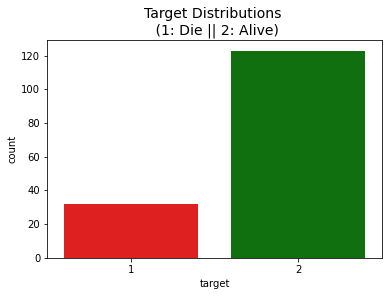

In [17]:
colors = ['r', 'g']

sns.countplot('target', data=data, palette=colors)
plt.title('Target Distributions \n (1: Die || 2: Alive)', fontsize=14)

#### 4. Check the datatype of each variable

In [8]:
data.dtypes

ID              int64
target          int64
age             int64
gender          int64
steroid       float64
antivirals      int64
fatigue       float64
malaise       float64
anorexia      float64
liverBig      float64
liverFirm     float64
spleen        float64
spiders       float64
ascites       float64
varices       float64
bili          float64
alk           float64
sgot          float64
albu          float64
protime       float64
histology       int64
dtype: object

#### 5. Drop columns which are not significant

In [18]:
data.drop(["ID"],axis=1,inplace=True)

In [19]:
data.columns

Index(['target', 'age', 'gender', 'steroid', 'antivirals', 'fatigue',
       'malaise', 'anorexia', 'liverBig', 'liverFirm', 'spleen', 'spiders',
       'ascites', 'varices', 'bili', 'alk', 'sgot', 'albu', 'protime',
       'histology'],
      dtype='object')

#### 6. Identify the Categorical Columns and store them in a variable cat_cols and numerical into num_cols

In [20]:
num_cols = ["age", "bili", "alk", "sgot", "albu", "protime"]
cat_cols = ['gender', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liverBig', 
            'liverFirm', 'spleen', 'spiders', 'ascites', 'varices', 'histology']

#### 7. Checking the null values

In [21]:
data.isnull().sum()
#data.isna().sum()

target         0
age            0
gender         0
steroid        1
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig      10
liverFirm     11
spleen         5
spiders        5
ascites        5
varices        5
bili           6
alk           29
sgot           4
albu          16
protime       67
histology      0
dtype: int64

In [22]:
data.head()

,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


#### 8. Split the data into X and y

In [23]:
X = data.drop("target",axis=1)
y = data["target"]

In [24]:
print(X.columns)


Index(['age', 'gender', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liverBig', 'liverFirm', 'spleen', 'spiders', 'ascites',
       'varices', 'bili', 'alk', 'sgot', 'albu', 'protime', 'histology'],
      dtype='object')


#### 9. Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [26]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 19)
(31, 19)
(124,)
(31,)


#### 10. Check null values in train and test, check value_counts in y_train and y_test

In [27]:
# null values in train
print(X_train.isna().sum())

age            0
gender         0
steroid        1
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig       8
liverFirm      8
spleen         4
spiders        4
ascites        4
varices        4
bili           6
alk           25
sgot           4
albu          10
protime       49
histology      0
dtype: int64


In [28]:
# null values in test
print(X_test.isna().sum())

age            0
gender         0
steroid        0
antivirals     0
fatigue        0
malaise        0
anorexia       0
liverBig       2
liverFirm      3
spleen         1
spiders        1
ascites        1
varices        1
bili           0
alk            4
sgot           0
albu           6
protime       18
histology      0
dtype: int64


In [29]:
print(y_train.value_counts())

2    95
1    29
Name: target, dtype: int64


In [30]:
print(y_test.value_counts())

2    28
1     3
Name: target, dtype: int64


#### 11. Impute the Categorical Columns with mode and Numerical columns with mean

In [31]:
df_cat_train = X_train[cat_cols]
df_cat_test = X_test[cat_cols]

In [32]:
df_cat_train.mode()

,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,histology
0,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1


In [33]:
# Impute on train
df_cat_train = df_cat_train.fillna(df_cat_train.mode().iloc[0])

# Impute on test
df_cat_test = df_cat_test.fillna(df_cat_train.mode().iloc[0])

In [34]:
df_num_train = X_train[num_cols]
df_num_test = X_test[num_cols]

In [35]:
# Impute on train
df_num_train = df_num_train.fillna(df_num_train.mean())

#Impute on test
df_num_test = df_num_test.fillna(df_num_train.mean())

In [36]:
# Combine numeric and categorical in train
X_train = pd.concat([df_num_train, df_cat_train], axis = 1)

# Combine numeric and categorical in test
X_test = pd.concat([df_num_test, df_cat_test], axis = 1)

In [37]:
X_train.columns

Index(['age', 'bili', 'alk', 'sgot', 'albu', 'protime', 'gender', 'steroid',
       'antivirals', 'fatigue', 'malaise', 'anorexia', 'liverBig', 'liverFirm',
       'spleen', 'spiders', 'ascites', 'varices', 'histology'],
      dtype='object')

In [38]:
X_train.isna().sum()

age           0
bili          0
alk           0
sgot          0
albu          0
protime       0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
histology     0
dtype: int64

In [39]:
X_test.isna().sum()

age           0
bili          0
alk           0
sgot          0
albu          0
protime       0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
histology     0
dtype: int64

#### Convert all the categorical columns to Integer Format before dummification (2.0 as 2 etc.)

In [40]:
# Train
X_train[cat_cols] = X_train[cat_cols].astype('int')

# Test
X_test[cat_cols] = X_test[cat_cols].astype('int')

#### 12. Dummify the Categorical columns

In [41]:
## Convert Categorical Columns to Dummies
# Train
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)

# Test
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

In [42]:
X_train.columns

Index(['age', 'bili', 'alk', 'sgot', 'albu', 'protime', 'gender_2',
       'steroid_2', 'antivirals_2', 'fatigue_2', 'malaise_2', 'anorexia_2',
       'liverBig_2', 'liverFirm_2', 'spleen_2', 'spiders_2', 'ascites_2',
       'varices_2', 'histology_2'],
      dtype='object')

In [43]:
X_test.columns

Index(['age', 'bili', 'alk', 'sgot', 'albu', 'protime', 'gender_2',
       'steroid_2', 'antivirals_2', 'fatigue_2', 'malaise_2', 'anorexia_2',
       'liverBig_2', 'liverFirm_2', 'spleen_2', 'spiders_2', 'varices_2',
       'histology_2'],
      dtype='object')

In [44]:
X_train.drop(columns=['varices_2'], axis=1, inplace=True)

#### 13. Scale the numeric attributes ["age", "bili", "alk", "sgot", "albu", "protime"]

In [45]:
#num_cols = ["age", "bili", "alk", "sgot", "albu", "protime"]
scaler = StandardScaler()

scaler.fit(X_train.loc[:,num_cols])

# scale on train
X_train.loc[:,num_cols] = scaler.transform(X_train.loc[:,num_cols])

# scale on test
X_test.loc[:,num_cols] = scaler.transform(X_test.loc[:,num_cols])

In [46]:
print(X_train.shape)
print(X_test.shape)

(124, 18)
(31, 18)


## MODEL BUILDING

    A. Stacking (With LR, DT, KNN)

## C. Stacking Model

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)

y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc = dtc.predict(X_test)

In [49]:
lrc = LogisticRegression()

lrc.fit(X_train,y_train)

y_pred_train_lrc = lrc.predict(X_train)
y_pred_test_lrc = lrc.predict(X_test)

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)  

knn.fit(X_train, y_train)

y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

Let us take mode of the above predictions

In [51]:
stack_train = pd.DataFrame([y_pred_train_dtc,y_pred_train_lrc,y_pred_train_knn])
stack_test = pd.DataFrame([y_pred_test_dtc,y_pred_test_lrc,y_pred_test_knn])

In [52]:
stack_train = stack_train.T
stack_test = stack_test.T

In [53]:
stack_train.columns = ['y_pred_train_dtc','y_pred_train_lrc','y_pred_train_knn']
stack_test.columns = ['y_pred_test_dtc','y_pred_test_lrc','y_pred_test_knn']

In [54]:
print(stack_train.shape)
print(stack_test.shape)

(124, 3)
(31, 3)


In [55]:
dtc = LogisticRegression()

dtc.fit(stack_train,y_train)

stacked_pred_train = dtc.predict(stack_train)
stacked_pred_test = dtc.predict(stack_test)

In [56]:
from sklearn.metrics import accuracy_score, f1_score

print("TRAIN DATA ACCURACY",accuracy_score(y_train,stacked_pred_train))
print("\nTrain data f1-score for class '1'",f1_score(y_train,stacked_pred_train,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,stacked_pred_train,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,stacked_pred_test))
print("\nTest data f1-score for class '1'",f1_score(y_test,stacked_pred_test,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,stacked_pred_test,pos_label=2))

TRAIN DATA ACCURACY 1.0

Train data f1-score for class '1' 1.0

Train data f1-score for class '2' 1.0


--------------------------------------


TEST DATA ACCURACY 0.7741935483870968

Test data f1-score for class '1' 0.36363636363636365

Test data f1-score for class '2' 0.8627450980392156
